<a href="https://colab.research.google.com/github/Grexilo/homework_act_functions/blob/main/leaky_ReLU/DLH_LekyReLU_001_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuarto Modelo

funcion de activación Leaky ReLU a = 0.01 con Early Stopping

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import random
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train_im = x_train
x_test_im = x_test

# Re-shape the data and normalize
# In this case, I re shape the images with all RGB channels
x_train = x_train.reshape(50000, 32*32*3).astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3).astype('float32')/255

In [ ]:
inputs = keras.Input(shape = 3072,name='Input_Layer')

layer_1 = layers.Dense(128,
                       activation = tf.keras.layers.LeakyReLU(alpha=0.01),
                       name = 'h_layer1')(inputs)

layer_2 = layers.Dense(128,
                       activation = tf.keras.layers.LeakyReLU(alpha=0.01),
                       name = 'h_layer2')(layer_1)

output = layers.Dense(10,
                      activation = 'softmax',
                      name = 'Ouput_Layer')(layer_2)

model = keras.Model(inputs = inputs,
                    outputs = output)

# Definiendo metricas para tener en cuenta
my_metrics = [tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Recall()]

model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = my_metrics
    )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 3072)]            0         
                                                                 
 h_layer1 (Dense)            (None, 128)               393344    
                                                                 
 h_layer2 (Dense)            (None, 128)               16512     
                                                                 
 Ouput_Layer (Dense)         (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# y_train convert to one_hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

# Definiendo el callback, en este caso early stopping
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

history = model.fit(
    x = x_train,
    y = y_train_one_hot,
    batch_size = 32,
    epochs = 100,
    verbose = 1,
    callbacks = my_callbacks,
    validation_split = 0.1
    )

Epoch 1/100
1407/1407 [==============================] - 10s 5ms/step - loss: 1.8604 - categorical_accuracy: 0.3253 - categorical_crossentropy: 1.8604 - recall: 0.0743 - val_loss: 1.7413 - val_categorical_accuracy: 0.3684 - val_categorical_crossentropy: 1.7413 - val_recall: 0.1208
Epoch 2/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6957 - categorical_accuracy: 0.3877 - categorical_crossentropy: 1.6957 - recall: 0.1423 - val_loss: 1.6769 - val_categorical_accuracy: 0.4090 - val_categorical_crossentropy: 1.6769 - val_recall: 0.1796
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6159 - categorical_accuracy: 0.4216 - categorical_crossentropy: 1.6159 - recall: 0.1825 - val_loss: 1.5954 - val_categorical_accuracy: 0.4348 - val_categorical_crossentropy: 1.5954 - val_recall: 0.1724
Epoch 4/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5685 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.5685 - reca

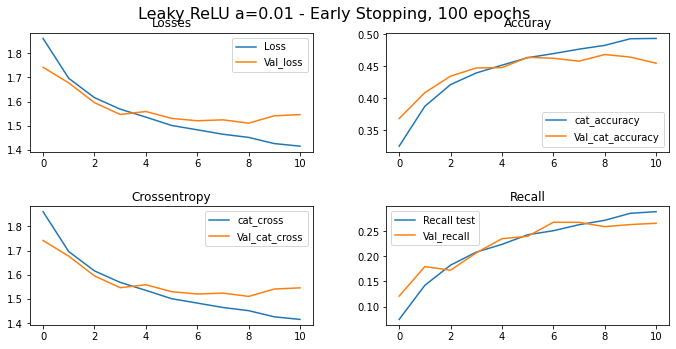

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss','Val_loss'])
ax1.set_title('Losses')

ax2.plot(history.history['categorical_accuracy'])
ax2.plot(history.history['val_categorical_accuracy'])
ax2.legend(['cat_accuracy','Val_cat_accuracy'])
ax2.set_title('Accuray')

ax3.plot(history.history['categorical_crossentropy'])
ax3.plot(history.history['val_categorical_crossentropy'])
ax3.legend(['cat_cross','Val_cat_cross'])
ax3.set_title('Crossentropy')

ax4.plot(history.history['recall'])
ax4.plot(history.history['val_recall'])
ax4.legend(['Recall test','Val_recall'])
ax4.set_title('Recall')
fig.tight_layout()
fig.suptitle('Leaky ReLU a=0.01 - Early Stopping, 100 epochs', fontsize=16)
fig.set_figwidth(10)
fig.set_figheight(5)

In [ ]:
metrics_names = model.metrics_names

test_eval = model.evaluate(
    x = x_train,
    y = y_train_one_hot
    )

print('Metricas sobre Test Data')
print(metrics_names[0], ': ', test_eval[0])
print(metrics_names[1], ': ', test_eval[1])
print(metrics_names[2], ': ', test_eval[2])
print(metrics_names[3], ': ', test_eval[3])

1563/1563 [==============================] - 6s 4ms/step - loss: 1.4355 - categorical_accuracy: 0.4865 - categorical_crossentropy: 1.4355 - recall: 0.2844
Metricas sobre Test Data
loss :  1.4354729652404785
categorical_accuracy :  0.4865399897098541
categorical_crossentropy :  1.4354729652404785
recall :  0.2844400107860565


In [ ]:
eval_test = model.evaluate(
    x = x_test,
    y = tf.keras.utils.to_categorical(y_test)
)

metrics_names = model.metrics_names

print('Metricas sobre Test Data')
print(metrics_names[0], ': ', eval_test[0])
print(metrics_names[1], ': ', eval_test[1])
print(metrics_names[2], ': ', eval_test[2])
print(metrics_names[3], ': ', eval_test[3])

313/313 [==============================] - 1s 3ms/step - loss: 1.5269 - categorical_accuracy: 0.4587 - categorical_crossentropy: 1.5269 - recall: 0.2730
Metricas sobre Test Data
loss :  1.5268584489822388
categorical_accuracy :  0.4587000012397766
categorical_crossentropy :  1.5268584489822388
recall :  0.27300000190734863


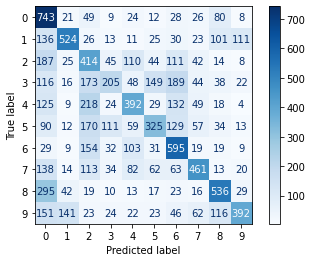

In [ ]:
y_predict = model.predict(x_test)

y_pred = []
for predict in y_predict:
  y_pred.append(tf.math.argmax(predict).numpy())

cm = confusion_matrix(y_test, y_pred)
labels =[0,1,2,3,4,5,6,7,8,9]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()